In [93]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from datatools import DataGrapher


%matplotlib inline

In [94]:
#Bring in the data

nba = pd.read_csv('./data/nba_analysis_data.csv')
nba.dropna(inplace = True)

In [95]:
#seperate test from train

nba_train = nba[nba.test == 0]
nba_test = nba[nba.test ==1]  #scott tarlow scotttarlow@gmail.com
#learn a domain

In [96]:
nba_train = nba_train[nba_train.playoff_game == 1]
nba_test = nba_test[nba_test.playoff_game == 1]

In [97]:

X_train = nba_train.drop(columns = ['cover','home_win_margin', 
                        'date', 'dataset','line_cv', 
                       'home_starter5', 'teams', 'away_team',
                       'away_starter2', 'away_starter3',
                       'away_starter4', 'away_starter5',
                       'ref_1', 'ref_3', 'crew_referees',
                      'away_pace', 'away_spread',
                        'away_line_cv',  'away_cover',
                       'home_payout', 'away_payout'])


#X = nba[features]
y_train = nba_train['cover']

In [98]:
X_test= nba_test.drop(columns = ['cover','home_win_margin', 
                        'date', 'dataset','line_cv', 
                       'home_starter5', 'teams', 'away_team',
                       'away_starter2', 'away_starter3',
                       'away_starter4', 'away_starter5',
                       'ref_1', 'ref_3', 'crew_referees',
                      'away_pace', 'away_spread',
                        'away_line_cv',  'away_cover',
                       'home_payout', 'away_payout'])

y_test = nba_test.away_cover

In [99]:

X_test.shape

(150, 141)

In [100]:
X_train.shape

(711, 141)

In [101]:

#create interactions and squared terms
poly = PolynomialFeatures(degree = 2, interaction_only= True)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
X_poly = pd.DataFrame(X_poly, 
                      columns = poly.get_feature_names(X_train.columns))
X_poly_test = pd.DataFrame(X_poly_test, 
                           columns = poly.get_feature_names(X_test.columns))


In [102]:

#scaling data to use in various other methods
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_poly)
X_test_scaled = ss.transform(X_poly_test)

In [103]:
from sklearn.decomposition import PCA

In [104]:
pc = PCA(n_components=150)
X_train_pc = pc.fit_transform(X_train_scaled)
X_test_pc = pc.transform(X_test_scaled)


In [105]:
var_exp = pc.explained_variance_ratio_
print('Explained variance:            ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [0.11605178 0.10547111 0.05089098 0.04630991 0.04418123 0.03226407
 0.03122277 0.03027212 0.0297601  0.02739417 0.02522088 0.02432342
 0.02282019 0.02073935 0.02031913 0.01850723 0.01694509 0.01685441
 0.01578199 0.01559065 0.01406564 0.01302763 0.01270907 0.01217285
 0.01116591 0.01061875 0.00937953 0.00913724 0.00885982 0.00882896
 0.00815489 0.00776667 0.00706363 0.00698982 0.0068722  0.00603972
 0.0059722  0.0059047  0.0052635  0.00480752 0.00451206 0.004295
 0.00408115 0.00396346 0.00370775 0.00361237 0.00341703 0.00316936
 0.00299835 0.00297487 0.00285736 0.00257099 0.00241353 0.00225634
 0.0022061  0.00215527 0.00205229 0.00184508 0.00181428 0.00178352
 0.00172155 0.00157376 0.00148907 0.00148598 0.00141488 0.00134987
 0.00125466 0.00115305 0.00111102 0.0010635  0.00103203 0.00097812
 0.00093445 0.00089971 0.00089352 0.00086451 0.00083399 0.00080924
 0.00076036 0.00073483 0.00071046 0.00069523 0.00066266 0.00062962
 0.00062251 0.00059246 0.0005640

In [106]:
lr = LogisticRegressionCV(Cs=[1000000, 100000] , 
                          penalty='l2', 
                          solver ='saga', 
                          cv =5 )
lr.fit(X_train_pc, y_train)
lr.score(X_train_pc, y_train)

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: Convergence

0.6751054852320675

In [107]:
lr.score(X_test_pc, y_test)

0.54

In [108]:
y_hat_lr = lr.predict(X_train_pc)
y_hat_lrp = lr.predict_proba(X_train_pc)
y_hat_lrt = lr.predict(X_test_pc)

In [109]:
print(classification_report(y_train, y_hat_lr))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       333
           1       0.70      0.68      0.69       378

   micro avg       0.68      0.68      0.68       711
   macro avg       0.67      0.67      0.67       711
weighted avg       0.68      0.68      0.68       711



In [110]:
confusion_matrix( y_train, y_hat_lr)

array([[223, 110],
       [121, 257]])

In [111]:
confusion_matrix( y_test, y_hat_lrt)

array([[49, 24],
       [45, 32]])

### Naive Bayes

Model seems to work best with bare bones information.  More information confused the model.

In [151]:
nb = GaussianNB()
nb_params = {
    'var_smoothing' : [.9,1,.7 ] 
    }

In [152]:
gs = GridSearchCV(nb, param_grid=nb_params, scoring='precision')
gs.fit(X_train_pc, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8471177944862155
{'var_smoothing': 1}


/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [153]:
gs.score(X_test_pc, y_test)

0.25

In [154]:
y_hat_nb = gs.predict(X_train_pc)
y_hat_nbp = gs.predict_proba(X_train_pc)
y_hat_nbt = gs.predict(X_test_pc)

In [148]:
print(classification_report(y_train, y_hat_nb))

              precision    recall  f1-score   support

           0       0.47      0.98      0.64       333
           1       0.71      0.03      0.06       378

   micro avg       0.48      0.48      0.48       711
   macro avg       0.59      0.51      0.35       711
weighted avg       0.60      0.48      0.33       711



In [149]:
confusion_matrix( y_train, y_hat_nb)

array([[328,   5],
       [366,  12]])

In [150]:
confusion_matrix( y_test, y_hat_nbt)

array([[70,  3],
       [76,  1]])

In [119]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [120]:
model = Sequential()
model.add(Dense(100, 
                activation = 'relu',
                input_dim = X_train_pc.shape[1]))
#model.add(Dense(200, activation = 'relu'))

#model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) #output layer 

In [121]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',
              metrics = ['accuracy'])
model.fit(X_train_pc, 
          y_train, epochs =4, 
          batch_size= 128, 
          validation_data=(X_test_pc, y_test))

Train on 711 samples, validate on 150 samples
Epoch 1/4
711/711 [==============================] - 0s 380us/step - loss: 2.1489 - acc: 0.5007 - val_loss: 2.2036 - val_acc: 0.4667
Epoch 2/4
711/711 [==============================] - 0s 18us/step - loss: 1.4694 - acc: 0.5387 - val_loss: 2.0466 - val_acc: 0.4600
Epoch 3/4
711/711 [==============================] - 0s 17us/step - loss: 1.0891 - acc: 0.5893 - val_loss: 1.9642 - val_acc: 0.4800
Epoch 4/4
711/711 [==============================] - 0s 19us/step - loss: 0.8953 - acc: 0.6315 - val_loss: 1.9256 - val_acc: 0.4867


In [122]:
y_hat_nn = model.predict(X_train_pc)
y_hat_nnp = model.predict_proba(X_train_pc)

In [123]:
rf = RandomForestClassifier()
rf_params = {'max_depth' : [140,120],
             'min_samples_split' : [200,190]}

In [124]:
gs = GridSearchCV(rf, param_grid=rf_params)
gs.fit(X_train_pc, y_train)
print(gs.best_score_)
print(gs.best_params_)

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0

0.5175808720112518
{'max_depth': 120, 'min_samples_split': 190}


/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [125]:
gs.score(X_test_pc, y_test)

0.5266666666666666

In [126]:
y_hat_rf = gs.predict(X_train_pc)
y_hat_rfp = gs.predict_proba(X_train_pc)

In [127]:
y_hat_rft = gs.predict(X_test_pc)

In [128]:
print(classification_report(y_train, y_hat_rf))

              precision    recall  f1-score   support

           0       0.70      0.42      0.53       333
           1       0.62      0.84      0.71       378

   micro avg       0.64      0.64      0.64       711
   macro avg       0.66      0.63      0.62       711
weighted avg       0.66      0.64      0.63       711



In [129]:
confusion_matrix( y_train, y_hat_rf)

array([[141, 192],
       [ 61, 317]])

In [130]:
confusion_matrix( y_test, y_hat_rft)

array([[33, 40],
       [31, 46]])

In [131]:
# import xgboost as xgb
# # read in data
# dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
# dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# # specify parameters via map
# param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
# num_round = 2
# bst = xgb.train(param, dtrain, num_round)
# # make prediction
# preds = bst.predict(dtest)

In [132]:
#modifying train and testing data to allow for changing prob thresholds and printing the 
#roc curves 
#Random Forest
nba_train.loc[:, 'actual_y'] = y_train
nba_train.loc[:, 'predicted_label_rf'] = y_hat_rf
nba_train.loc[:, 'predicted_proba_rfp'] = y_hat_rfp[:, 1]

#Bayesian

nba_train.loc[:, 'predicted_label_nb'] = y_hat_nb
nba_train.loc[:, 'predicted_proba_nbp'] = y_hat_nbp[:, 1]

nba_train.loc[:, 'predicted_label_lr'] = y_hat_lr
nba_train.loc[:, 'predicted_proba_lrp'] = y_hat_lrp[:, 1]

In [133]:
from sklearn.metrics import roc_curve, auc

In [134]:
fpr, tpr, _ = roc_curve(y_train, nba_train['predicted_proba_lrp'])
roc_auc = auc(fpr, tpr)

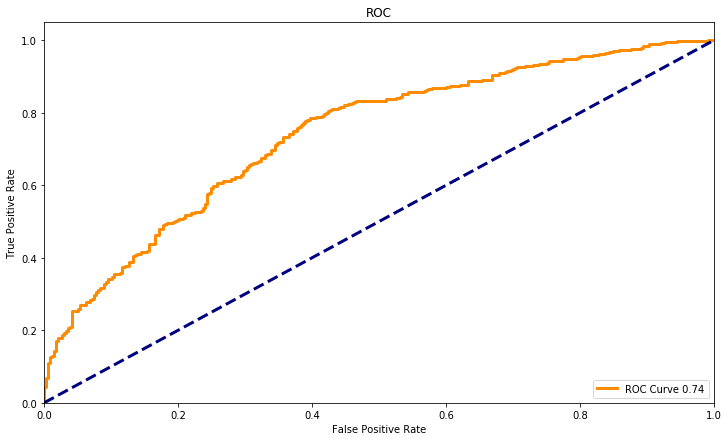

In [135]:
# Plot 
plt.figure(figsize = (12,7))
line_width = 3

plt.plot(fpr, tpr, lw = line_width, color="darkorange", label = "ROC Curve %.2f" % roc_auc)
plt.plot([0,1], [0, 1], lw = line_width, linestyle="--", color="navy")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [136]:
for prob in range(40, 65, 1):
    proba = prob/100
    
    nba_train.loc[:, 'predicted_label']= nba_train['predicted_proba_rfp'].map(
    lambda p: 1 if p > proba else 0)
    
#     X_train.loc[:, 'predicted_label']= X_train['predicted_proba_rfp'].map(
#     lambda p: 1 if p > proba else 0)
    
#    results = X_test[X_test['predicted_label']==1]
    print('Test  ' + str(proba))
#     print (confusion_matrix(y_test, nba['predicted_label']))
    results_neg = nba_train[nba_train['predicted_label']==1]
    print ("Return of Home Games: ", results_neg.home_payout.sum())
#     print(' Train  ' + str(proba))
#     print(confusion_matrix(y_train, X_train['predicted_label']))

Test  0.4
Return of Home Games:  27.60199999999999
Test  0.41
Return of Home Games:  29.60199999999999
Test  0.42
Return of Home Games:  31.692999999999998
Test  0.43
Return of Home Games:  38.693
Test  0.44
Return of Home Games:  46.96599999999999
Test  0.45
Return of Home Games:  53.42099999999999
Test  0.46
Return of Home Games:  69.60299999999998
Test  0.47
Return of Home Games:  80.33099999999999
Test  0.48
Return of Home Games:  83.96899999999998
Test  0.49
Return of Home Games:  101.78799999999997
Test  0.5
Return of Home Games:  104.15299999999998
Test  0.51
Return of Home Games:  112.60899999999998
Test  0.52
Return of Home Games:  116.88399999999999
Test  0.53
Return of Home Games:  125.97699999999998
Test  0.54
Return of Home Games:  122.25299999999999
Test  0.55
Return of Home Games:  113.62
Test  0.56
Return of Home Games:  98.441
Test  0.57
Return of Home Games:  84.80699999999999
Test  0.58
Return of Home Games:  59.26499999999999
Test  0.59
Return of Home Games:  45.448